In [1]:
from magicgap import *
from pathlib import Path

In [ ]:
def avg_magic_avg_subspace_mc(D, d, d_s, M=750):
    n = (D.ndim - 2) // 2
    d_b = d**n
    samples = [avg_magic_subspace_multiqudit(D, rand_basis(d_s, d_b), d) for _ in range(M)]
    return np.mean(samples), np.std(samples)

# Alternative
def avg_magic_avg_subspace_mc2(D, d_s, M=250, R=250):
    D = flatten_if_needed(D)
    d_b = D[0].shape[0]
    means = []
    stds = []
    for i in range(R):
        mean, std = avg_magic_subspace_mc(D, rand_basis(d_s, d_b), M=M)
        means.append(mean)
        stds.append(std)
    means, stds = np.array(means), np.array(stds)
    mu = np.mean(means)
    return mu, np.sqrt((1/R**2)*sum(stds**2)/M + (1/(R-1))*sum((means - mu)**2))

In [18]:
n = 1
for d in [3,4,5,6,7,8]:
    d_b = d**n
    d_s_range = np.arange(2, d_b)
    D = wh_operators(*[d]*n)
    ase_b = avg_magic_mc(D)[1]
    ase_s = [avg_magic_avg_subspace_mc(D, d, d_s)[1] for d_s in d_s_range]
    save_data("data/comparing_variances_n%dd%d" % (n, d), {"d": d, "n": n, "ase_b": ase_b, "ase_s": np.asarray(ase_s).tolist()})

In [26]:
results = {}
search_path = Path("data")
for file_path in search_path.glob("comparing_variances*"):
    data = load_data("data/"+file_path.stem)
    results[data["d"]] = data

In [29]:
dims = np.sort(list(results.keys()))
max_d = np.max(dims)
d_s_range = np.arange(2, max_d)

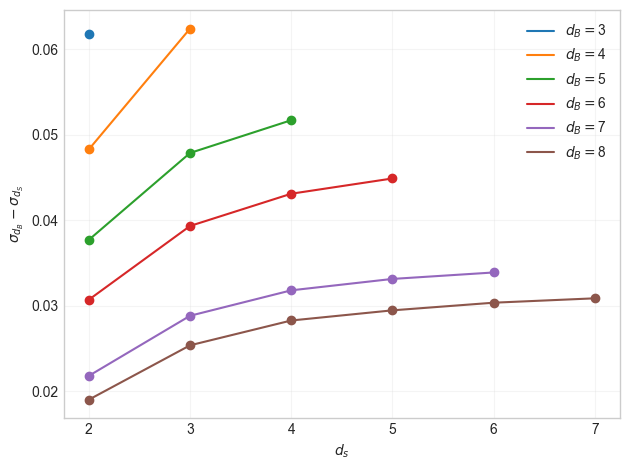

In [46]:
plt.style.use('seaborn-v0_8-whitegrid')

fig, ax = plt.subplots(1)
for d in dims:
    result = results[d]
    diff = [result["ase_b"] - _ for _ in result["ase_s"]]
    ax.plot(np.arange(2, d), diff, label="$d_B=$%d" % d)
    ax.scatter(np.arange(2, d), diff)
ax.set_xticks(d_s_range)
ax.set_xlabel("$d_s$")
ax.set_ylabel("$\\sigma_{d_B}-\\sigma_{d_S}$")
ax.grid(True, alpha=0.2)
ax.legend()
plt.tight_layout()
plt.savefig("img/comparing_stds.pdf", dpi=600, bbox_inches='tight')